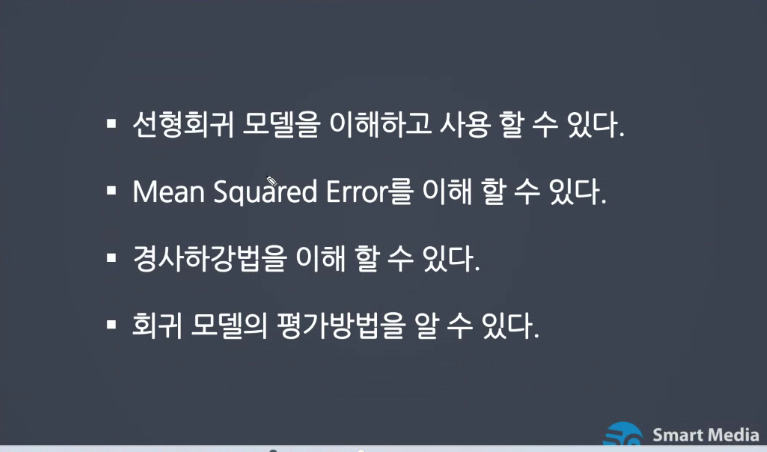

In [ ]:
#이게 선형회귀

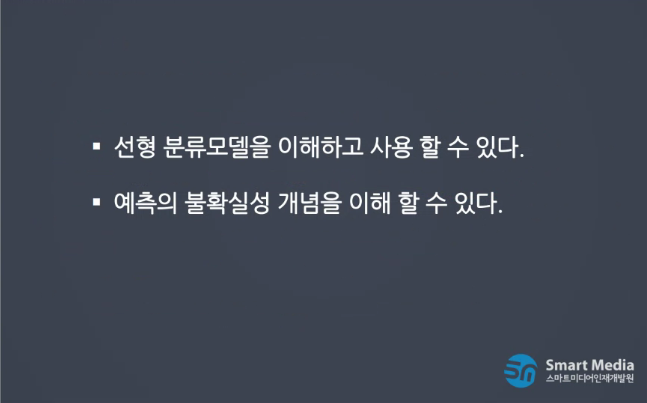

In [ ]:
#선형분류 예축확률 = 예측의 불확실성

- 선형모델은 분류든 회귀든 데이터를 잘 표현할 수 있는 공식을 만들어내는 것은 같다
- 분류는 만들어진 공식 뒤에 비교연산자>0 이 들어가 0보다 큰지 작은지에 따라 예측 결과를 만들어냄
- 이진분류 (2가지 ) 3가지 이상이면 다중분류
- 머신러닝에서 클래스는 분류데이터상에서 답에 들어가는 카테고리를 클래스라고 한다 
- 양성클래스 : 예측자가 관심을 가지는 쪽 음성클래스: 조금 관심 없는 쪽 이건 분석하는 사람의 마음
- 선형회귀는 그래프에서 만들어진 선 자체가 예측값으로 활용
- 선형분류는 선을 학습할때 이 선이 예측값이 아니라 경계값의 역할을 하게 됨
- 넘어가면 양성클래스 넘어가지 않으면 음성 클래스

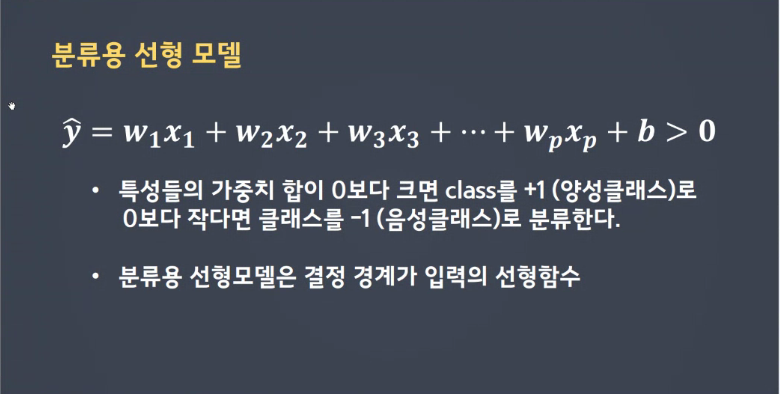

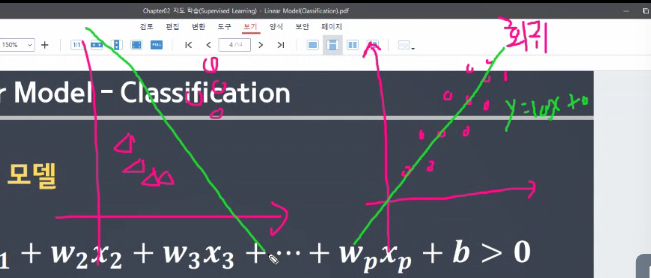

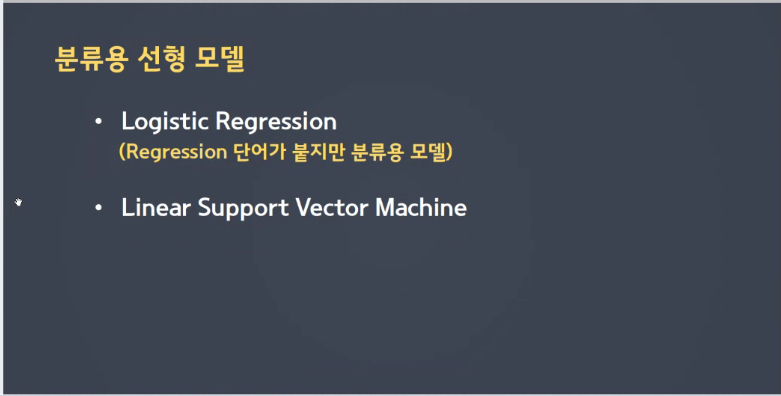

In [ ]:
#로지스틱 리그레이션 - 딥러닝의 기본 애를 중점적으로 
#보통 classifiter가 붙으면 분류 regression이 오면 회귀모델

리니어 말고 로지스틱의 장점:일반 리니어는 극단적인 값들이 등장했을ㄸ깨 대체가 힘들다 
                            로지스틱은 곡선이 만들어짐

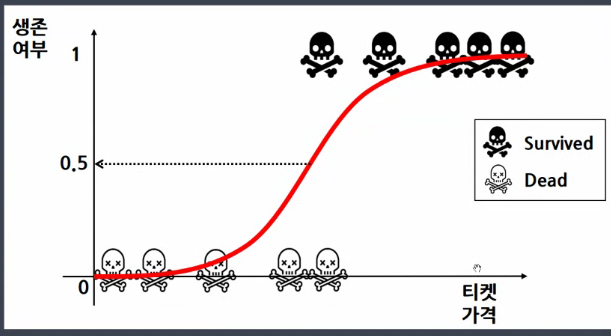


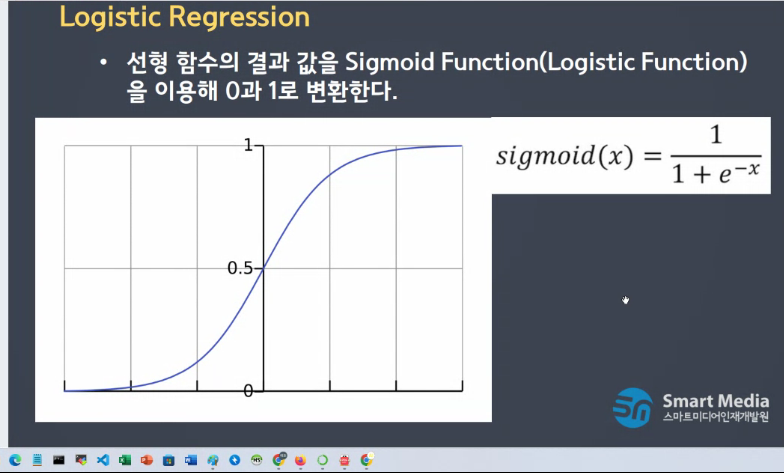

- 선형회귀모델 에다가 sigmoid(y) imort

리니어 리그레이션에서 수학 공식 추가해 로지스틱이 됨

핵심함수 sigmoid

0.5이상이면 양성 클래스 0.5미만이면 음성 클래스  경계선이란 상관없이 
0.5가 기준이 된 이유 실제 수식에서 나온 값이 0이라고 했을떄 sigmoid안에 넣은다고 치면 0.5가 나온다 

학습하는 원리 

예측값을 뽑고 실제 값과 비교를 하게 됨 


분류는회귀와 달리 비용함수를 다른 알고리즘은 쓴다 crossentropy(크로스엔트로피)
요즘 ai에서 대두되는 것이 생성모델 ==생성해내는 모델들 원리상에 비용함수가 들어있음

분류모델도 학습을 할려면 예측과 실제값의 차이를 봐야 함

회귀 데이터들은 정답이 1과 0으로 되어있기 때문애 평균제곱 오차를 해도 1이거나 0밖에 안나온다 
평균제곱오차가 적으면 거의 맞으니까 적게 수정하라 라는 뜻


- 로그를 사용해 더 잘 맞출 수 있도록 크로스 엔트로피 
- 0에 가까울 수록 값들이 엄청나게 커진다 
- 이 로그 함수를 그냥 쓰는게 아니라 hx는 예측값 앞에 마이너스 붙은 이유 원래 로그함수가 음수여서 양수 나오게 할려구 

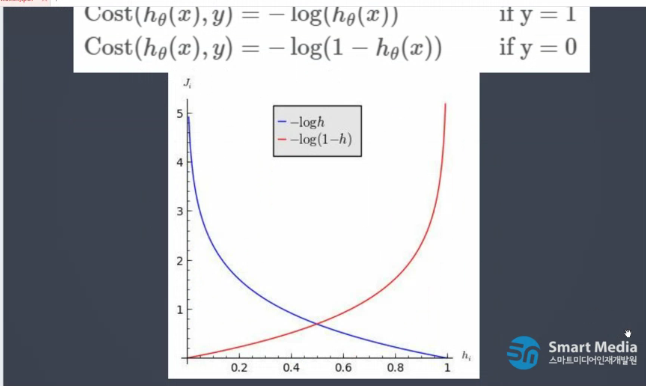

In [ ]:
#실제 정답이 1일때는 이 파란색을 가지고 함
#실제 정답이 0일떄 이 빨간색 모델이 0이라고 예측했는데 값은 1

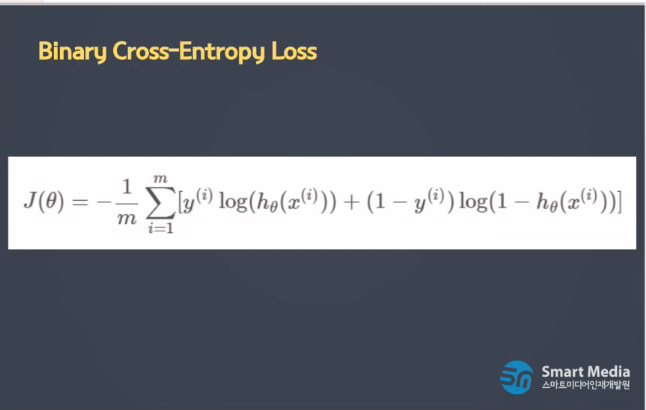

In [ ]:
# Y 실제 값 

### support Vector Machine

- 학습을 통해서 직선을 찾는데 관점이 조금 다르다  


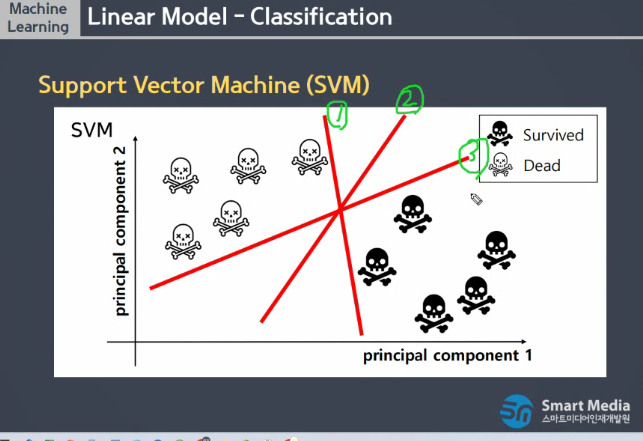

In [ ]:
# 정답은 2번
#1,3 번은 데이터에 너무 근접해 있다 머신러닝은 과거 데이터를 가지고 미지의 데이터를 분류해야 함 
#그래서 붙으면 안됨 너무 가까운것은 살짝 불안전한 느낌임 확 바꿔버릴 수 있다 


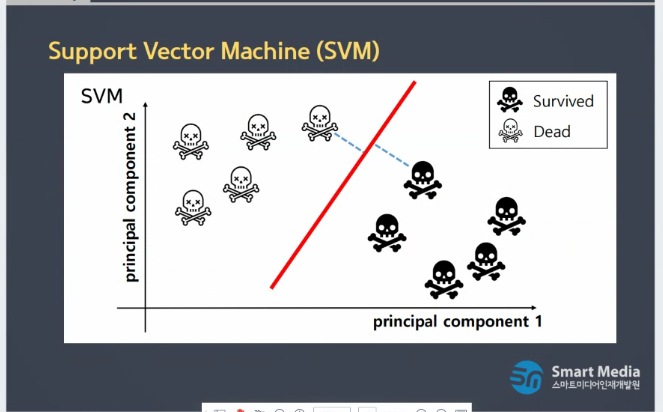

In [ ]:
# 각 데이터그릅의 제일말단 경계에 있ㄲ는거  == 그게 서포트 벡터 
#이 데이터들이 가장 큰 마진 값을 가지도록 하는거 (마진 HTMI에서 여백)

### 목표
- 선형분류 모델을 이해하고 사용해보자 
- 예측의 불확실성(예측확률을 이해하자 
- 분류평가지표를 이해하자 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("./digit-recognizer/train.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 맨앞이 정답 데이터  색상 정보를 가져다가 붙암 그래서 색상 정보가 1차원으로 되어 있는 겅
#픽셀  흑백사진은 한 픽셀 안에 얼마나 검고 흰지 알려주는 데이터 한가지만 있음 컬러 사진은 한 픽셀 안의 숫자 3개

In [19]:
#img() = data.iloc["행", "열"]
img0 = data.iloc[45, 1:]

In [20]:
 img0_resize= img0.values.reshape(28,28)

In [22]:
target = data.iloc[45, 0]
target

6

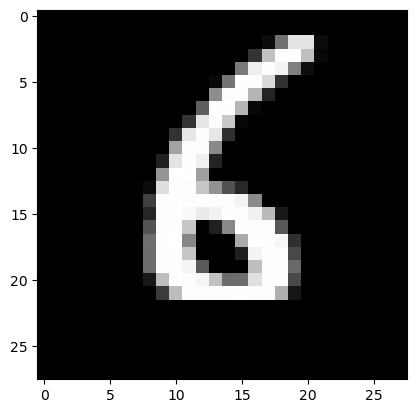

In [21]:
plt.imshow(img0_resize,cmap = "gray")

In [24]:
print(max(img0))
print(min(img0))

255
0


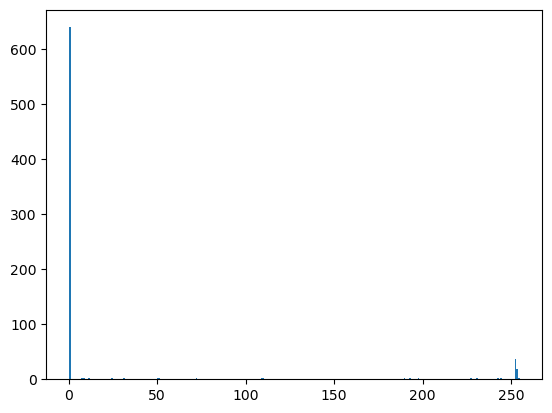

In [26]:
plt.hist(img0,bins=256)
plt.show()

## 교차검증활용모델 성능 비교

In [ ]:
#숫자 0번부터 9번까지 뭐인지 라벨링 달려 있음

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC #선형 SVM
from sklearn.model_selection import cross_val_score #교차검증함수

In [30]:
knn_model = KNeighborsClassifier()
tree_model  = DecisionTreeClassifier()
logi_model = LogisticRegression()
svm_model = LinearSVC()

In [31]:
X_train = data.iloc[:,1:] #문제 
y_train = data.iloc[:,0] # 정답

In [32]:
knn_score = cross_val_score(knn_model, X_train, y_train, cv =5, n_jobs = -1)
tree_score = cross_val_score(tree_model, X_train, y_train, cv =5, n_jobs = -1)
logi_score = cross_val_score(logi_model, X_train, y_train, cv =5, n_jobs = -1)
svm_score = cross_val_score(svm_model, X_train, y_train, cv =5, n_jobs = -1)

## 교차검증이란

- 학습할때 데이터 셋을 두동강으로 나눔 train, test 하나의 모델 안에서 하이퍼 파라미터를 조절함
- 문제 :튜닝할떄 훈련데이터로 학습을 할때 테스트 케이스를 잘 맞출 수 있는 튜닝으로 갈 수 가 있다 
- 이 특정 데이터에 맞는 튜닝이 될 수 있다 
- 머신러닝은 미지의 데이털을 맞추는 게 중요 
- 그래서  테스트 데이터를 여러개 만들어서 하나만 말고 다 잘 맞추는지 보기
- 근데 현실적으로는 불가능 하기 떄문에 안전장치로 한번 더 쪼갬
- 훈련데이터로 학습 , 검증데이터로 몇점이 나오는지 점검, 마지막에 test로 최종점수를 봄
- 점수가 검증은 높았는데 평가때 점수가 하락되면 내 모델이 검증 데이터에 fit하게 되어있는것이 아닌가 의심


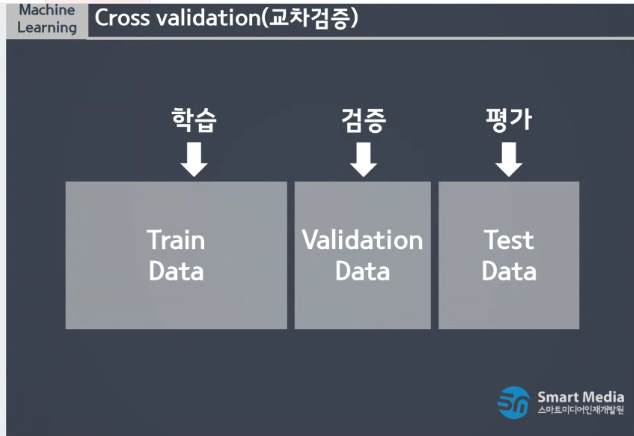

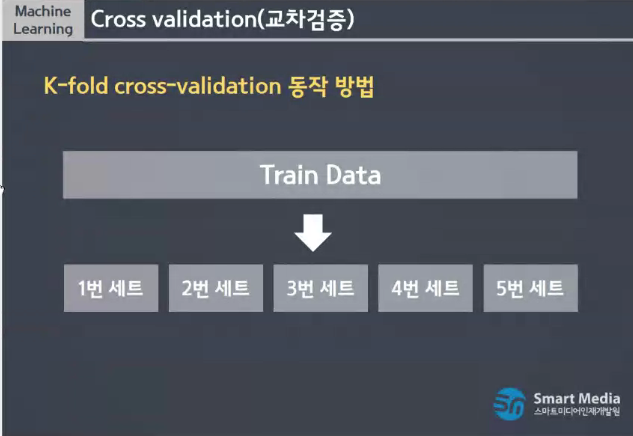

In [ ]:
훈련데이터를 내가 설정한 갯수만큼 쪼개는걸 예시로 듬
이걸 가지고 학습과 평가를 여러번 듬


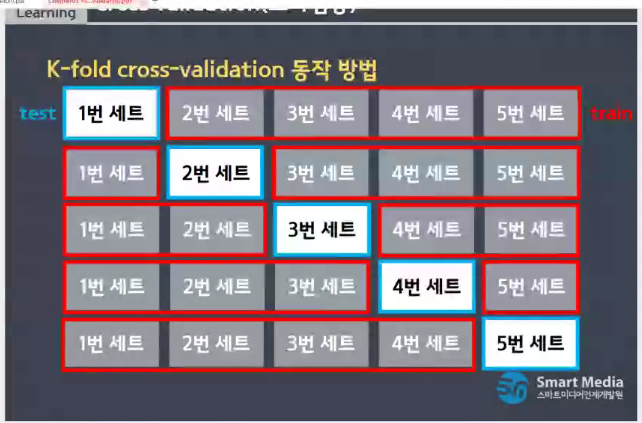

In [33]:
#마치 검증데이터가 전혀 다른 데이터로 검증을 하는 듯한 효과를 주는 방법 
#그래서 5조각으로 쪼개서 한것 

In [38]:
print("Knn:",knn_score.mean())
print("tree:",tree_score.mean())
print("logi:",logi_score.mean())
print("svm:",svm_score.mean())


Knn: 0.965857142857143
tree: 0.8543095238095239
logi: 0.9158809523809524
svm: 0.8688809523809523
